In [1]:
import pandas as pd
import numpy as np
from astropy.cosmology import Planck13
from astropy.io import fits
from astropy.table import Table
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt

import disperse

In [2]:
np.random.seed(0)

In [3]:
cosmo = Planck13
H0 = cosmo.H0.value
Om = cosmo.Om0
Ol = 0.69288
Ok = 0.0
print(f'H0 = {cosmo.H0.value}')
print(f'Om = {cosmo.Om0}')
print(f'Ol = {0.69288}')

H0 = 67.77
Om = 0.30712
Ol = 0.69288


In [4]:
gal_RA_int = (140, 260)
gal_DEC_int = (-10, 30)
gal_Z_int = (0, 1.0)

In [5]:
galaxies = pd.read_csv('SDSS/SDSS_DR16.csv')
galaxies = galaxies[galaxies['class'] == 'GALAXY']
galaxies = galaxies[(gal_RA_int[0] <= galaxies['ra']) & (galaxies['ra'] <= gal_RA_int[1])]
galaxies = galaxies[(gal_DEC_int[0] <= galaxies['dec']) & (galaxies['dec'] <= gal_DEC_int[1])]
galaxies = galaxies[(gal_Z_int[0] < galaxies['z']) & (galaxies['z'] <= gal_Z_int[1])]
galaxies = galaxies[['ra', 'dec', 'z']]
galaxies.columns = ['RA', 'DEC', 'Z']
galaxies.drop_duplicates(subset=['RA', 'DEC', 'Z'])
galaxies.reset_index(drop=True, inplace=True)
galaxies

,RA,DEC,Z
0,146.71421,-1.041304,0.021275
1,146.71421,-1.041304,0.021222
2,146.91945,-0.990492,0.213925
3,146.74413,-0.652191,0.203783
4,146.85983,-0.808902,0.126554
...,...,...,...
931855,146.13969,26.500868,0.903536
931856,146.20911,26.557960,0.628224
931857,146.09398,26.524402,0.845268
931858,146.32252,26.549261,0.058894


In [6]:
# CL_NUM = 100

In [7]:
cl_RA_int = (160, 240)
cl_DEC_int = (0, 20)
cl_Z_int = (0, 0.2)

In [8]:
dat = Table.read('DR5_cluster-catalog_v1.1.fits', format='fits')
clusters = dat[['RADeg', 'decDeg', 'redshift', 'redshiftType', 'M500c']].to_pandas()
clusters = clusters[clusters['redshiftType'] == b'spec']
clusters = clusters[['RADeg', 'decDeg', 'redshift', 'M500c']]
clusters.columns = ['RA', 'DEC', 'Z', 'M']
clusters = clusters[(cl_RA_int[0] <= clusters['RA']) & (clusters['RA'] <= cl_RA_int[1])]
clusters = clusters[(cl_DEC_int[0] <= clusters['DEC']) & (clusters['DEC'] <= cl_DEC_int[1])]
clusters = clusters[(cl_Z_int[0] < clusters['Z']) & (clusters['Z'] <= cl_Z_int[1])]
clusters = clusters[['RA', 'DEC', 'Z', 'M']]
clusters.columns = ['RA', 'DEC', 'Z', 'M']
clusters.drop_duplicates(subset=['RA', 'DEC', 'Z', 'M'])
full_clusters = clusters.copy()
CL_NUM = min(100, full_clusters.shape[0])
clusters = clusters.iloc[np.random.choice(list(range(clusters.shape[0])), CL_NUM)]
clusters.reset_index(drop=True, inplace=True)
clusters = clusters.assign(ID=list(range(1, clusters.shape[0]+1)))
clusters = clusters.assign(R=[0] * clusters.shape[0])
clusters

,RA,DEC,Z,M,ID,R
0,163.466549,16.844133,0.085400,2.420530,1,0
1,168.333507,17.585858,0.171000,2.698716,2,0
2,168.333507,17.585858,0.171000,2.698716,3,0
3,231.456126,18.238496,0.127174,1.447222,4,0
4,187.693803,10.558505,0.167168,5.480988,5,0
5,214.262241,13.906848,0.165317,1.664325,6,0
6,217.958949,13.531505,0.159770,1.672366,7,0
7,229.079233,0.087499,0.117890,2.515684,8,0
8,220.645847,9.379163,0.168429,1.087521,9,0
9,176.029178,5.791789,0.103741,1.870998,10,0


In [9]:
dat.columns

<TableColumns names=('name','RADeg','decDeg','SNR','y_c','err_y_c','fixed_SNR','fixed_y_c','fixed_err_y_c','template','tileName','redshift','redshiftErr','redshiftType','redshiftSource','M500c','M500c_errPlus','M500c_errMinus','M500cCal','M500cCal_errPlus','M500cCal_errMinus','M200m','M200m_errPlus','M200m_errMinus','M500cUncorr','M500cUncorr_errPlus','M500cUncorr_errMinus','M200mUncorr','M200mUncorr_errPlus','M200mUncorr_errMinus','footprint_DESY3','footprint_HSCs19a','footprint_KiDSDR4','zCluster_delta','zCluster_errDelta','zCluster_source','RM','RM_LAMBDA','RM_LAMBDA_ERR','RMDESY3','RMDESY3_LAMBDA_CHISQ','RMDESY3_LAMBDA_CHISQ_E','CAMIRA','CAMIRA_N_mem','opt_RADeg','opt_decDeg','opt_positionSource','notes','knownLens','knownLensRefCode','warnings')>

In [10]:
q_RA_int = (160, 240)
q_DEC_int = (0, 20)
q_Z_int = (0, 1.0)

In [11]:
dat = Table.read('DR14Q_v4_4.fits', format='fits')
quasars = dat[['RA', 'DEC', 'Z']].to_pandas()
quasars = quasars[(q_RA_int[0] <= quasars['RA']) & (quasars['RA'] <= q_RA_int[1])]
quasars = quasars[(q_DEC_int[0] <= quasars['DEC']) & (quasars['DEC'] <= q_DEC_int[1])]
quasars = quasars[(q_Z_int[0] < quasars['Z']) & (quasars['Z'] <= q_Z_int[1])]
quasars.drop_duplicates(subset=['RA', 'DEC', 'Z'])
quasars.reset_index(drop=True, inplace=True)
quasars = quasars.assign(R=[0] * quasars.shape[0])
quasars = quasars.assign(M=[0] * quasars.shape[0])
full_quasars = quasars.copy()
quasars = quasars.iloc[np.random.choice(list(range(quasars.shape[0])), CL_NUM)]
quasars = quasars.assign(ID=list(range(clusters.shape[0]+1, clusters.shape[0]+1+quasars.shape[0])))
quasars.reset_index(drop=True, inplace=True)
quasars

,RA,DEC,Z,R,M,ID
0,220.568877,11.346712,0.5100,0,0,42
1,166.687767,10.355417,0.9050,0,0,43
2,181.596136,7.554795,0.5590,0,0,44
3,233.727661,14.155351,0.7472,0,0,45
4,171.494904,6.250110,0.8355,0,0,46
5,216.507678,19.130610,0.8670,0,0,47
6,239.493777,2.934832,0.8420,0,0,48
7,224.506271,2.359625,0.9518,0,0,49
8,215.314518,12.883509,0.6920,0,0,50
9,193.917556,13.615078,0.7440,0,0,51


In [12]:
dat.columns

<TableColumns names=('SDSS_NAME','RA','DEC','THING_ID','PLATE','MJD','FIBERID','SPECTRO','Z','Z_ERR','SOURCE_Z','Z_VI','Z_PIPE','Z_PIPE_ERR','ZWARNING','Z_PCA','Z_PCA_ER','Z_MGII','BOSS_TARGET1','ANCILLARY_TARGET1','ANCILLARY_TARGET2','EBOSS_TARGET0','EBOSS_TARGET1','EBOSS_TARGET2','N_SPEC_SDSS','N_SPEC_BOSS','N_SPEC','PLATE_DUPLICATE','MJD_DUPLICATE','FIBERID_DUPLICATE','SPECTRO_DUPLICATE','BI_CIV','ERR_BI_CIV','RUN_NUMBER','RERUN_NUMBER','COL_NUMBER','FIELD_NUMBER','OBJ_ID','PSFFLUX','IVAR_PSFFLUX','PSFMAG','ERR_PSFMAG','MI','GAL_EXT','RASS_COUNTS','RASS_COUNTS_SNR','SDSS2ROSAT_SEP','FLUX_0.2_2.0keV','FLUX_0.2_2.0keV_ERR','FLUX_2.0_12.0keV','FLUX_2.0_12.0keV_ERR','FLUX_0.2_12.0keV','FLUX_0.2_12.0keV_ERR','LUM_0.2_12.0keV','SDSS2XMM_SEP','GALEX_MATCHED','FUV','FUV_IVAR','NUV','NUV_IVAR','JMAG','ERR_JMAG','JSNR','JRDFLAG','HMAG','ERR_HMAG','HSNR','HRDFLAG','KMAG','ERR_KMAG','KSNR','KRDFLAG','SDSS2MASS_SEP','W1MAG','ERR_W1MAG','W1SNR','W1CHI2','W2MAG','ERR_W2MAG','W2SNR','W2CHI2','W3MAG

In [13]:
cl_quas = pd.concat((clusters, quasars), axis=0)
cl_quas = cl_quas.assign(TYPE=[1] * clusters.shape[0] + [0] * clusters.shape[0])
# cl_quas = cl_quas.assign(ID=range(1, cl_quas.shape[0]+1))
cl_quas

,RA,DEC,Z,M,ID,R,TYPE
0,163.466549,16.844133,0.085400,2.420530,1,0,1
1,168.333507,17.585858,0.171000,2.698716,2,0,1
2,168.333507,17.585858,0.171000,2.698716,3,0,1
3,231.456126,18.238496,0.127174,1.447222,4,0,1
4,187.693803,10.558505,0.167168,5.480988,5,0,1
...,...,...,...,...,...,...,...
36,234.590530,18.730007,0.706100,0.000000,78,0,0
37,215.156250,10.513796,0.680600,0.000000,79,0,0
38,195.279361,10.587473,0.827000,0.000000,80,0,0
39,239.591095,12.092564,0.574500,0.000000,81,0,0


In [14]:
z = [round(0.05 + 0.002 * i, 5) for i in range(0, 476)]
ID, RA, DEC, Z, Z_true, TYPE, M = [], [], [], [], [], [], []
for i in range(cl_quas.shape[0]):
    row = cl_quas.iloc[i]
    ID = ID + [int(row['ID'])] * len(z)
    RA = RA + [row['RA']] * len(z)
    DEC = DEC + [row['DEC']] * len(z)
    Z = Z + z.copy()
    Z_true = Z_true + [row['Z']] * len(z)
    TYPE = TYPE + [int(row['TYPE'])] * len(z)
    M = M + [row['M']] * len(z)
len(ID), len(TYPE), len(RA), len(DEC), len(Z)

(39032, 39032, 39032, 39032, 39032)

In [15]:
cl_quas = pd.DataFrame({'ID': ID, 'RA': RA, 'DEC': DEC, 'Z': Z, 'Z_true': Z_true, 'TYPE': TYPE, 'M': M})
cl_quas

,ID,RA,DEC,Z,Z_true,TYPE,M
0,1,163.466549,16.844133,0.050,0.0854,1,2.42053
1,1,163.466549,16.844133,0.052,0.0854,1,2.42053
2,1,163.466549,16.844133,0.054,0.0854,1,2.42053
3,1,163.466549,16.844133,0.056,0.0854,1,2.42053
4,1,163.466549,16.844133,0.058,0.0854,1,2.42053
...,...,...,...,...,...,...,...
39027,82,183.076553,3.590996,0.992,0.7856,0,0.00000
39028,82,183.076553,3.590996,0.994,0.7856,0,0.00000
39029,82,183.076553,3.590996,0.996,0.7856,0,0.00000
39030,82,183.076553,3.590996,0.998,0.7856,0,0.00000


In [16]:
DPS = disperse.Disperse3D(
    galaxies, '_disperse_03/bin/',
    H0, Om, Ol, Ok,
    clusters=cl_quas
)

In [17]:
DPS.count_cart_coords()

In [18]:
cl_quas = DPS.clusters.copy()

In [19]:
SIGMA = 5.0
SMOOTH = 1
BOARD = 'smooth'
ANGLE = 30

In [20]:
sigmas = [
         0.2, 0.4, 0.6, 0.8,
    1.0, 1.2, 1.4, 1.6, 1.8,
    2.0, 2.2, 2.4, 2.6, 2.8,
    3.0, 3.2, 3.4, 3.6, 3.8, 
    4.0, 4.2, 4.4, 4.6, 4.8, 
    5.0, 5.2, 5.4, 5.6, 5.8, 
    6.0, 6.2, 6.4, 6.6, 6.8,
    7.0, 7.2, 7.4, 7.6, 7.8,
    8.0, 8.2, 8.4, 8.6, 8.8,
    9.0, 9.2, 9.4, 9.6, 9.8,
    10.0, 10.2, 10.4, 10.6, 10.8,
    11.0, 11.2, 11.4, 11.6, 11.8,
    12.0, 12.2, 12.4, 12.6, 12.8,
    13.0, 13.2, 13.4, 13.6, 13.8,
    14.0
]

In [21]:
cl_dists = []
for sigma in tqdm(sigmas):
    DPS = disperse.Disperse3D.read(f'ACT_01_dumps/{sigma}/')
    
    cl_conn, fil_conn, cl_min_dists \
        = DPS.count_conn([3] * cl_quas.shape[0], cl_quas)
    cl_dists.append(np.array(cl_min_dists)[None,:])
    
dists = np.concatenate(cl_dists, axis=0)

100%|██████████| 70/70 [12:11<00:00, 10.45s/it]


In [22]:
dists = dists.T

In [23]:
dists.shape

(39032, 70)

In [25]:
rads = list(range(1, 61))

In [26]:
true_sigmas = []

for i, rad in enumerate(rads):
    t = np.zeros(cl_quas.shape[0])
    for j, sigma in tqdm(enumerate(sigmas)):
        t[dists[:,j] <= rad] = sigma

    true_sigmas.append(t)
    
true_sigmas = np.array(true_sigmas)

70it [00:00, 14412.71it/s]
70it [00:00, 9327.49it/s]
70it [00:00, 15948.79it/s]
70it [00:00, 10988.48it/s]
70it [00:00, 20749.21it/s]
70it [00:00, 16111.58it/s]
70it [00:00, 18548.32it/s]
70it [00:00, 17827.51it/s]
70it [00:00, 17874.18it/s]
70it [00:00, 15035.66it/s]
70it [00:00, 12915.20it/s]
70it [00:00, 14682.27it/s]
70it [00:00, 17816.69it/s]
70it [00:00, 16626.16it/s]
70it [00:00, 10636.19it/s]
70it [00:00, 14782.80it/s]
70it [00:00, 14737.54it/s]
70it [00:00, 13093.76it/s]
70it [00:00, 10328.25it/s]
70it [00:00, 12782.50it/s]
70it [00:00, 13855.65it/s]
70it [00:00, 11073.03it/s]
70it [00:00, 13096.68it/s]
70it [00:00, 11639.30it/s]
70it [00:00, 11102.76it/s]
70it [00:00, 10927.14it/s]
70it [00:00, 9642.71it/s]
70it [00:00, 9619.96it/s]
70it [00:00, 10575.27it/s]
70it [00:00, 9917.96it/s]
70it [00:00, 13019.44it/s]
70it [00:00, 9952.92it/s]
70it [00:00, 9889.89it/s]
70it [00:00, 10830.00it/s]
70it [00:00, 11255.56it/s]
70it [00:00, 11570.04it/s]
70it [00:00, 13154.77it/s]
70it [0

In [27]:
true_sigmas = true_sigmas.T

In [28]:
true_sigmas.shape

(39032, 60)

In [29]:
import pickle
with open('ACT_rf.pkl', 'rb') as f:
    rf = pickle.load(f)

In [30]:
rf_scores = rf.predict_proba(dists)[:,1].reshape(-1)

In [31]:
rf_scores.shape

(39032,)

In [91]:
# cl_quas = cl_quas.assign(RF_score=rf_scores)
# cl_quas = cl_quas.assign(sigma_10_score=true_sigmas[:,9])
# cl_quas
for i in range(len(rads)):
    cl_quas[f'sigma_{i+1}_score'] = true_sigmas[:,i]
cl_quas

,ID,RA,DEC,Z,Z_true,TYPE,M,CX,CY,CZ,...,sigma_51_score,sigma_52_score,sigma_53_score,sigma_54_score,sigma_55_score,sigma_56_score,sigma_57_score,sigma_58_score,sigma_59_score,sigma_60_score
0,1,163.466549,16.844133,0.050,0.0854,1,2.42053,-200.581615,59.542384,63.346942,...,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
1,1,163.466549,16.844133,0.052,0.0854,1,2.42053,-208.505802,61.894668,65.849529,...,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
2,1,163.466549,16.844133,0.054,0.0854,1,2.42053,-216.422300,64.244670,68.349688,...,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
3,1,163.466549,16.844133,0.056,0.0854,1,2.42053,-224.331104,66.592388,70.847417,...,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
4,1,163.466549,16.844133,0.058,0.0854,1,2.42053,-232.232206,68.937819,73.342714,...,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39027,82,183.076553,3.590996,0.992,0.7856,0,0.00000,-3366.765874,-180.955759,211.592747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39028,82,183.076553,3.590996,0.994,0.7856,0,0.00000,-3371.754359,-181.223878,211.906261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39029,82,183.076553,3.590996,0.996,0.7856,0,0.00000,-3376.737004,-181.491684,212.219407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39030,82,183.076553,3.590996,0.998,0.7856,0,0.00000,-3381.713819,-181.759176,212.532188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'score')

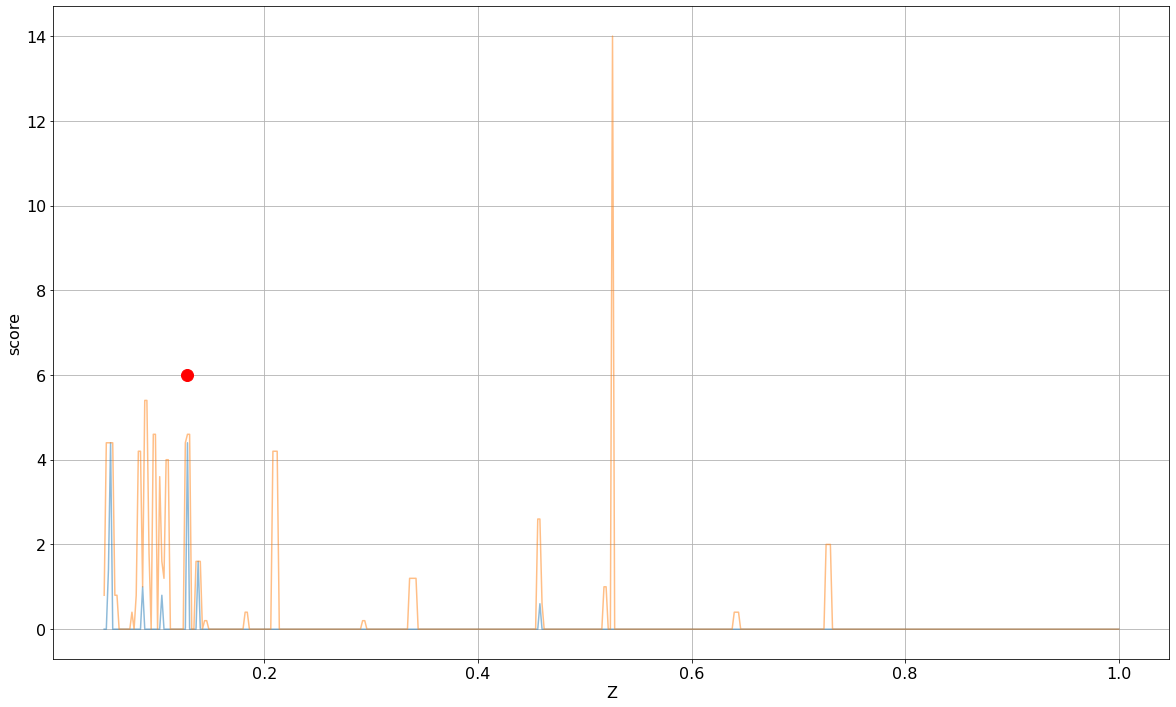

In [96]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 12))
plt.grid()

ID = 4

plt.plot(
    cl_quas[cl_quas['ID'] == ID]['Z'][:],
    cl_quas[cl_quas['ID'] == ID]['sigma_2_score'][:],
    alpha=0.5,
    label='sigma_score'
)
plt.plot(
    cl_quas[cl_quas['ID'] == ID]['Z'][:],
    cl_quas[cl_quas['ID'] == ID]['sigma_9_score'][:],
    alpha=0.5,
    label='sigma_score'
)

plt.plot(cl_quas[cl_quas['ID'] == ID]['Z_true'].iloc[0], 6, 'ro', markersize=12)

plt.xlabel('Z')
plt.ylabel('score')
#         plt.savefig(f'Cluster: {i}-{j} (M={clusters[clusters["ID"] == ID]["M"].iloc[0]}).jpg')
# plt.legend()

In [33]:
clusters['Z'].max()

0.2

In [34]:
np.quantile(full_clusters['M'], [0.33, 0.66])

array([1.57083273, 2.12911845])

In [35]:
M_qs = np.quantile(full_clusters['M'], [0.33, 0.66])
M_qs

array([1.57083273, 2.12911845])

In [36]:
M1_Z_qs = np.quantile(full_clusters[full_clusters['M'] <= M_qs[0]]['Z'], [0.25, 0.5, 0.75])
M1_Z_qs

array([0.09915282, 0.13052268, 0.17844844])

In [37]:
id_ = clusters[(clusters['M'] <= M_qs[0]) & (clusters['Z'] < M1_Z_qs[0])].sort_values(['Z']).iloc[-1]['ID']
id_ = int(id_)
id_

31

In [38]:
clusters[clusters['ID'] == id_]

,RA,DEC,Z,M,ID,R
30,228.822188,4.394406,0.0972,1.39344,31,0


In [39]:
idx = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

idx[0][0] = clusters[(clusters['M'] <= M_qs[0]) & (clusters['Z'] < M1_Z_qs[0])].sort_values(['Z']).iloc[-1]['ID']
idx[0][1] = clusters[(clusters['M'] <= M_qs[0]) & (clusters['Z'] > M1_Z_qs[1])].sort_values(['Z']).iloc[0]['ID']
idx[0][2] = clusters[(clusters['M'] <= M_qs[0]) & (clusters['Z'] > M1_Z_qs[2])].sort_values(['Z']).iloc[0]['ID']

idx[1][0] = clusters[(M_qs[0] <= clusters['M']) & (clusters['M'] <= M_qs[1]) & (clusters['Z'] < M1_Z_qs[0])].sort_values(['Z']).iloc[-1]['ID']
idx[1][1] = clusters[(M_qs[0] <= clusters['M']) & (clusters['M'] <= M_qs[1]) & (clusters['Z'] > M1_Z_qs[1])].sort_values(['Z']).iloc[0]['ID']
idx[1][2] = clusters[(M_qs[0] <= clusters['M']) & (clusters['M'] <= M_qs[1]) & (clusters['Z'] > M1_Z_qs[2])].sort_values(['Z']).iloc[0]['ID']

idx[2][0] = clusters[(M_qs[1] <= clusters['M']) & (clusters['Z'] < M1_Z_qs[0])].sort_values(['Z']).iloc[-1]['ID']
idx[2][1] = clusters[(M_qs[1] <= clusters['M']) & (clusters['Z'] > M1_Z_qs[1])].sort_values(['Z']).iloc[0]['ID']
idx[2][2] = clusters[(M_qs[1] <= clusters['M']) & (clusters['Z'] > M1_Z_qs[2])].sort_values(['Z']).iloc[0]['ID']

IndexError: single positional indexer is out-of-bounds

In [ ]:
idx

In [ ]:
for i in range(3):
    for j in range(3):
        ID=idx[i][j]

        font = {'size': 16}
        plt.rc('font', **font)
        fig = plt.figure(figsize=(20, 12))
        plt.grid()

        plt.plot(
            cl_quas[cl_quas['ID'] == ID]['Z'][:],
            cl_quas[cl_quas['ID'] == ID]['sigma_19_score'][:],
            alpha=0.5,
            label='sigma_score'
        )
        plt.plot(
            cl_quas[cl_quas['ID'] == ID]['Z'][:],
            cl_quas[cl_quas['ID'] == ID]['RF_score'][:] * 8,
            alpha=0.5,
            label='rf_score'
        )
#         plt.vlines(cl_quas[cl_quas['ID'] == ID]['Z_true'].iloc[0], 0, 8, colors='r')
        plt.plot(cl_quas[cl_quas['ID'] == ID]['Z_true'].iloc[0], 8, 'ro', markersize=12)

        plt.xlabel('Z')
        plt.ylabel('score')
        plt.title(f'Cluster: {i}-{j} (M={clusters[clusters["ID"] == ID]["M"].iloc[0]})')
#         plt.savefig(f'Cluster: {i}-{j} (M={clusters[clusters["ID"] == ID]["M"].iloc[0]}).jpg')
        plt.legend()

In [ ]:
idx_q = [0, 0, 0]

In [ ]:
Z_qs = np.quantile(full_quasars['Z'], [0.25, 0.5, 0.75])
Z_qs

In [ ]:
idx_q[0] = quasars[(quasars['Z'] < Z_qs[0])].sort_values(['Z']).iloc[-1]['ID']
idx_q[1] = quasars[(quasars['Z'] < Z_qs[1])].sort_values(['Z']).iloc[-1]['ID']
idx_q[2] = quasars[(quasars['Z'] > Z_qs[2])].sort_values(['Z']).iloc[0]['ID']

In [ ]:
for i in range(3):
    ID=idx_q[i]

    font = {'size': 16}
    plt.rc('font', **font)
    fig = plt.figure(figsize=(20, 12))
    plt.grid()

    plt.plot(
        cl_quas[cl_quas['ID'] == ID]['Z'][:],
        cl_quas[cl_quas['ID'] == ID]['sigma_19_score'][:],
        alpha=0.5,
        label='sigma_score'
    )
    plt.plot(
        cl_quas[cl_quas['ID'] == ID]['Z'][:],
        cl_quas[cl_quas['ID'] == ID]['RF_score'][:] * 8,
        alpha=0.5,
        label='rf_score'
    )
#         plt.vlines(cl_quas[cl_quas['ID'] == ID]['Z_true'].iloc[0], 0, 8, colors='r')
    plt.plot(cl_quas[cl_quas['ID'] == ID]['Z_true'].iloc[0], 8, 'ro', markersize=12)

    plt.xlabel('Z')
    plt.ylabel('score')
    plt.title(f'Quasar: {i}')
    plt.legend()
#     plt.savefig(f'Quasar: {i}.jpg')

In [ ]:
full_quasars['Z'].max()